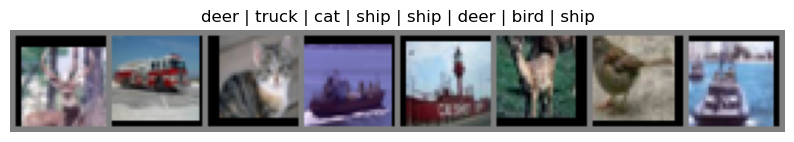

In [ ]:
import os
import pickle
import numpy as np
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Path to CIFAR-10 dataset
dataset_path = r"*\\cifar-10-batches-py"

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Function to load CIFAR-10 batch
def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

# Load entire CIFAR-10 dataset (all classes)
def load_cifar10_all_classes(dataset_path):
    images, labels = [], []
    for i in range(1, 6):  # Load 5 training batches
        batch = unpickle(os.path.join(dataset_path, f'data_batch_{i}'))
        data = batch[b'data'].reshape(-1, 3, 32, 32)
        targets = np.array(batch[b'labels'])

        images.append(data)
        labels.append(targets)
    
    images = np.concatenate(images)
    labels = np.concatenate(labels)
    return images, labels

# Data augmentation and preprocessing pipeline
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Custom Dataset Class
class CIFARFullDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image = self.images[idx].astype(np.uint8)
        image = np.transpose(image, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
        
        if self.transform:
            image = self.transform(image)
        
        label = self.labels[idx]
        return image, label

# Load full dataset
images, labels = load_cifar10_all_classes(dataset_path)
dataset = CIFARFullDataset(images, labels, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Function to display images
def imshow(img_tensor, labels):
    img_tensor = img_tensor / 2 + 0.5  # unnormalize
    npimg = img_tensor.numpy()
    plt.figure(figsize=(10, 2))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(' | '.join([class_names[label] for label in labels]))
    plt.axis('off')
    plt.show()

# Get a batch and show images
data_iter = iter(dataloader)
images_batch, labels_batch = next(data_iter)
imshow(torchvision.utils.make_grid(images_batch), labels_batch)



Epoch 1/5
Step 1/313 - Loss: 2.4722
Step 2/313 - Loss: 2.3256
Step 3/313 - Loss: 2.2900
Step 4/313 - Loss: 2.3284
Step 5/313 - Loss: 2.3040
Step 6/313 - Loss: 2.2770
Step 7/313 - Loss: 2.3206
Step 8/313 - Loss: 2.3117
Step 9/313 - Loss: 2.2634
Step 10/313 - Loss: 2.2759
Step 11/313 - Loss: 2.2261
Step 12/313 - Loss: 2.2584
Step 13/313 - Loss: 2.2442
Step 14/313 - Loss: 2.2339
Step 15/313 - Loss: 2.2204
Step 16/313 - Loss: 2.1548
Step 17/313 - Loss: 2.2344
Step 18/313 - Loss: 2.1742
Step 19/313 - Loss: 2.2322
Step 20/313 - Loss: 2.1779
Step 21/313 - Loss: 2.1271
Step 22/313 - Loss: 2.1692
Step 23/313 - Loss: 2.1699
Step 24/313 - Loss: 2.2152
Step 25/313 - Loss: 2.1640
Step 26/313 - Loss: 2.0337
Step 27/313 - Loss: 2.0932
Step 28/313 - Loss: 2.1086
Step 29/313 - Loss: 2.1282
Step 30/313 - Loss: 2.1518
Step 31/313 - Loss: 2.0640
Step 32/313 - Loss: 2.0634
Step 33/313 - Loss: 2.1522
Step 34/313 - Loss: 2.1037
Step 35/313 - Loss: 2.0389
Step 36/313 - Loss: 2.0947
Step 37/313 - Loss: 2.1245

C:\Users\aamir\AppData\Local\Temp\ipykernel_27608\45183423.py:183: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_vit.pth"))



Evaluation Metrics:
Accuracy : 0.5181
Precision: 0.5235
Recall   : 0.5181
F1-Score : 0.5166

Classification Report:
              precision    recall  f1-score   support

    airplane       0.62      0.54      0.58      1014
  automobile       0.62      0.55      0.59      1014
        bird       0.34      0.45      0.39       952
         cat       0.40      0.39      0.39      1016
        deer       0.48      0.43      0.46       997
         dog       0.50      0.34      0.40      1025
        frog       0.59      0.51      0.55       980
       horse       0.54      0.58      0.56       977
        ship       0.64      0.72      0.68      1003
       truck       0.51      0.65      0.57      1022

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.52      0.52      0.52     10000



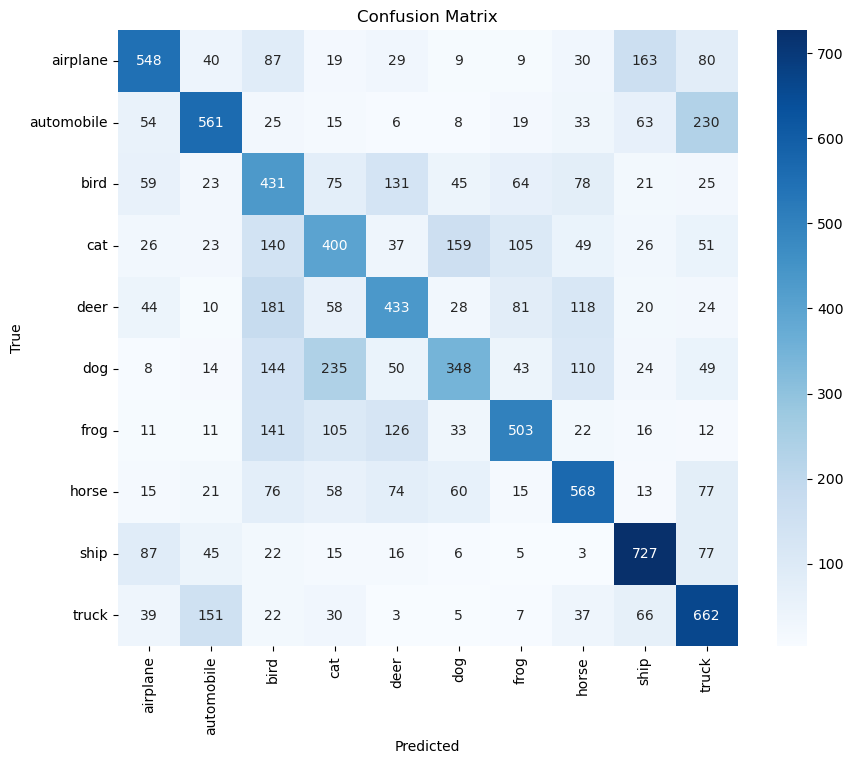

In [ ]:
import os
import pickle
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn.functional as F
from torchvision import transforms
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision

# Configs
PATCH_SIZE = 4
EMBED_DIM = 128
NUM_HEADS = 4
NUM_LAYERS = 6
NUM_CLASSES = 10
MLP_DIM = 256
DROPOUT = 0.1
EPOCHS = 5
BATCH_SIZE = 128
LEARNING_RATE = 3e-4
IMAGE_SIZE = 32
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Load CIFAR-10 Python batch
def unpickle(file):
    with open(file, 'rb') as fo:
        return pickle.load(fo, encoding='bytes')

def load_cifar10_all_classes(dataset_path):
    images, labels = [], []
    for i in range(1, 6):
        batch = unpickle(os.path.join(dataset_path, f'data_batch_{i}'))
        data = batch[b'data'].reshape(-1, 3, 32, 32)
        targets = np.array(batch[b'labels'])
        images.append(data)
        labels.append(targets)
    return np.concatenate(images), np.concatenate(labels)

# Custom Dataset
class CIFARFullDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self): return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx].astype(np.uint8)
        image = np.transpose(image, (1, 2, 0))
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(self.labels[idx], dtype=torch.long)


# Transform
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load Data
dataset_path = r"*\\cifar-10-batches-py"
images, labels = load_cifar10_all_classes(dataset_path)
train_size = int(0.8 * len(images))
val_size = len(images) - train_size

train_images, test_images = images[:train_size], images[train_size:]
train_labels, test_labels = labels[:train_size], labels[train_size:]

train_dataset = CIFARFullDataset(train_images, train_labels, transform=train_transform)
test_dataset = CIFARFullDataset(test_images, test_labels, transform=test_transform)


train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# ViT Modules
class PatchEmbedding(nn.Module):
    def __init__(self, in_channels=3, patch_size=PATCH_SIZE, emb_dim=EMBED_DIM, img_size=IMAGE_SIZE):
        super().__init__()
        self.proj = nn.Conv2d(in_channels, emb_dim, kernel_size=patch_size, stride=patch_size)
    def forward(self, x):
        x = self.proj(x).flatten(2).transpose(1, 2)
        return x

class PositionalEncoding(nn.Module):
    def __init__(self, n_patches, emb_dim):
        super().__init__()
        self.pos_embedding = nn.Parameter(torch.randn(1, n_patches + 1, emb_dim))
    def forward(self, x):
        return x + self.pos_embedding[:, :x.size(1), :]

class TransformerEncoderBlock(nn.Module):
    def __init__(self, emb_dim, num_heads, mlp_dim, dropout):
        super().__init__()
        self.norm1 = nn.LayerNorm(emb_dim)
        self.attn = nn.MultiheadAttention(emb_dim, num_heads, dropout=dropout, batch_first=True)
        self.norm2 = nn.LayerNorm(emb_dim)
        self.mlp = nn.Sequential(
            nn.Linear(emb_dim, mlp_dim), nn.GELU(), nn.Dropout(dropout),
            nn.Linear(mlp_dim, emb_dim), nn.Dropout(dropout),
        )
    def forward(self, x):
        x = x + self.attn(self.norm1(x), self.norm1(x), self.norm1(x))[0]
        return x + self.mlp(self.norm2(x))

class VisionTransformer(nn.Module):
    def __init__(self):
        super().__init__()
        self.patch_embed = PatchEmbedding()
        n_patches = (IMAGE_SIZE // PATCH_SIZE) ** 2
        self.cls_token = nn.Parameter(torch.randn(1, 1, EMBED_DIM))
        self.pos_embed = PositionalEncoding(n_patches, EMBED_DIM)
        self.transformer = nn.Sequential(*[TransformerEncoderBlock(EMBED_DIM, NUM_HEADS, MLP_DIM, DROPOUT) for _ in range(NUM_LAYERS)])
        self.norm = nn.LayerNorm(EMBED_DIM)
        self.head = nn.Linear(EMBED_DIM, NUM_CLASSES)
    def forward(self, x):
        x = self.patch_embed(x)
        cls_tokens = self.cls_token.expand(x.size(0), -1, -1)
        x = torch.cat([cls_tokens, x], dim=1)
        x = self.pos_embed(x)
        x = self.transformer(x)
        return self.head(self.norm(x[:, 0]))

# Training Setup
model = VisionTransformer().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# Training
best_acc, patience, no_improve = 0, 3, 0
for epoch in range(EPOCHS):
    model.train()
    running_loss, correct, total = 0, 0, 0
    print(f"\nEpoch {epoch+1}/{EPOCHS}")
    for step, (images, labels) in enumerate(train_loader, 1):
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = outputs.max(1)
        total += labels.size(0)
        correct += preds.eq(labels).sum().item()
        print(f"Step {step}/{len(train_loader)} - Loss: {loss.item():.4f}")
    acc = correct / total
    print(f"Epoch {epoch+1} - Avg Loss: {running_loss/len(train_loader):.4f} | Accuracy: {acc:.4f}")
    scheduler.step()
    if acc > best_acc:
        best_acc = acc
        no_improve = 0
        torch.save(model.state_dict(), "best_vit.pth")
    else:
        no_improve += 1
        if no_improve >= patience:
            print("Early stopping!")
            break

# Evaluation

model.load_state_dict(torch.load("best_vit.pth"))
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print("\nEvaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}\n")

# Detailed report per class
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Epoch [1], Step [1/313], Loss: 2.3106
Epoch [1], Step [2/313], Loss: 2.3235
Epoch [1], Step [3/313], Loss: 2.3050
Epoch [1], Step [4/313], Loss: 2.2833
Epoch [1], Step [5/313], Loss: 2.2430
Epoch [1], Step [6/313], Loss: 2.1955
Epoch [1], Step [7/313], Loss: 2.1087
Epoch [1], Step [8/313], Loss: 2.1232
Epoch [1], Step [9/313], Loss: 2.1505
Epoch [1], Step [10/313], Loss: 2.1932
Epoch [1], Step [11/313], Loss: 2.1445
Epoch [1], Step [12/313], Loss: 2.0013
Epoch [1], Step [13/313], Loss: 1.9552
Epoch [1], Step [14/313], Loss: 2.0823
Epoch [1], Step [15/313], Loss: 1.9942
Epoch [1], Step [16/313], Loss: 2.1314
Epoch [1], Step [17/313], Loss: 1.9575
Epoch [1], Step [18/313], Loss: 1.8617
Epoch [1], Step [19/313], Loss: 2.0163
Epoch [1], Step [20/313], Loss: 1.8671
Epoch [1], Step [21/313], Loss: 1.9927
Epoch [1], Step [22/313], Loss: 1.8439
Epoch [1], Step [23/313], Loss: 1.9335
Epoch [1], Step [24/313], Loss: 1.9847
Epoch [1], Step [25/313], Loss: 1.9023
Epoch [1], Step [26/313], Loss: 1.

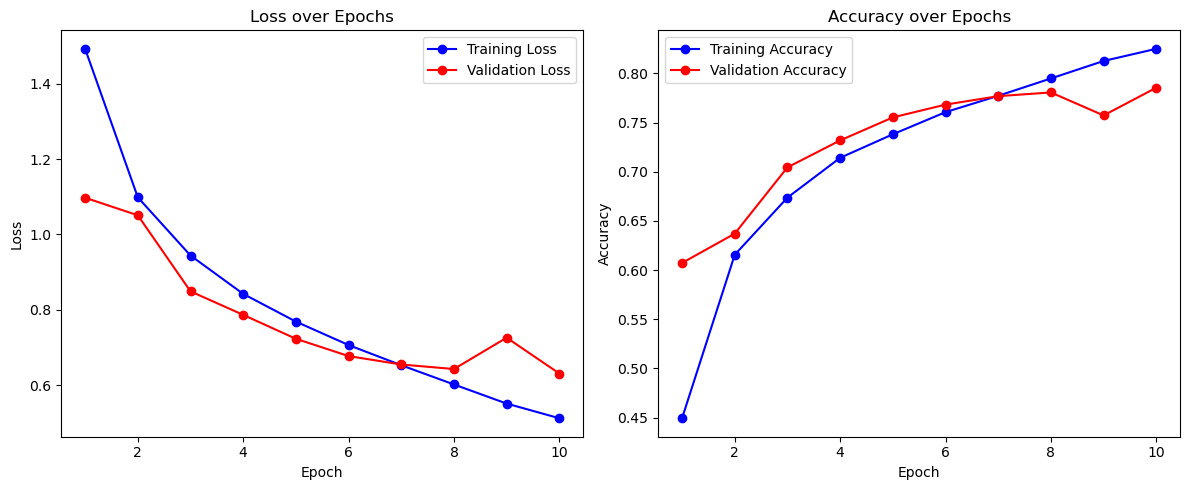


Evaluation Metrics:
Accuracy : 0.7854
Precision: 0.7878
Recall   : 0.7855
F1-Score : 0.7804

Classification Report:
               precision    recall  f1-score   support

    airplane       0.83      0.84      0.83      1044
  automobile       0.84      0.92      0.88      1013
        bird       0.82      0.62      0.70       984
         cat       0.70      0.53      0.60       984
        deer       0.73      0.76      0.75       959
         dog       0.78      0.62      0.69      1056
        frog       0.72      0.93      0.81       996
       horse       0.71      0.90      0.79      1003
        ship       0.90      0.86      0.88       994
       truck       0.86      0.87      0.87       967

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000



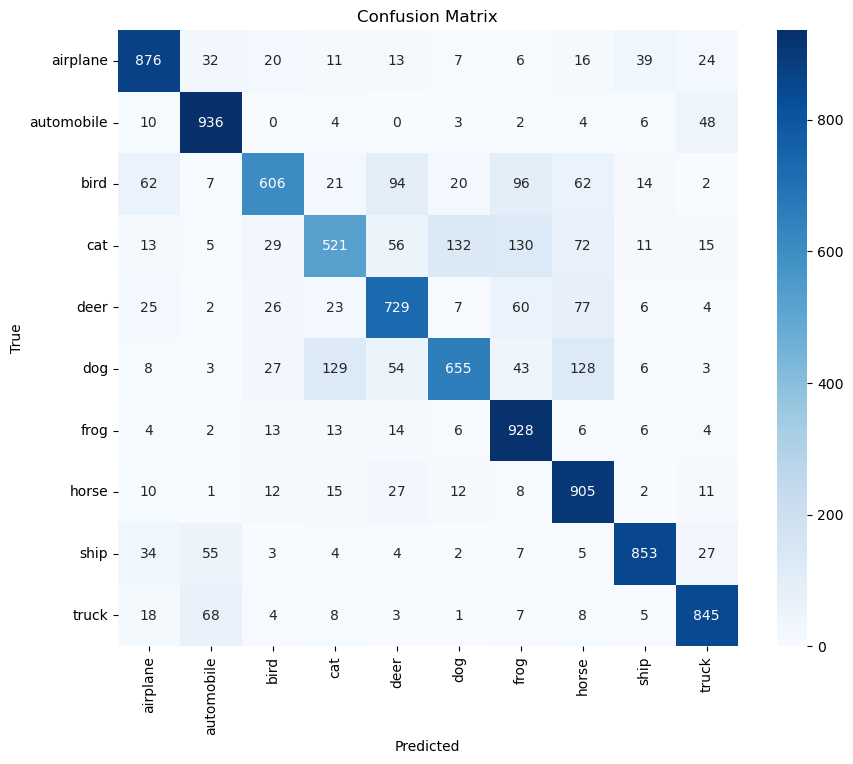

In [ ]:
import os
import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
BATCH_SIZE = 128
EPOCHS = 10
LEARNING_RATE = 1e-3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATASET_PATH = r"*\\cifar-10-batches-py"
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Load and preprocess CIFAR-10
def unpickle(file):
    with open(file, 'rb') as fo:
        return pickle.load(fo, encoding='bytes')

def load_cifar10_all_classes(dataset_path):
    images, labels = [], []
    for i in range(1, 6):
        batch = unpickle(os.path.join(dataset_path, f'data_batch_{i}'))
        data = batch[b'data'].reshape(-1, 3, 32, 32)
        targets = np.array(batch[b'labels'])
        images.append(data)
        labels.append(targets)
    return np.concatenate(images), np.concatenate(labels)

class CIFARFullDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
    def __len__(self): return len(self.images)
    def __getitem__(self, idx):
        image = self.images[idx].astype(np.uint8)
        image = np.transpose(image, (1, 2, 0))
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(self.labels[idx], dtype=torch.long)

train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
test_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load and split
images, labels = load_cifar10_all_classes(DATASET_PATH)
full_dataset = CIFARFullDataset(images, labels, transform=train_transform)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
val_dataset.dataset.transform = test_transform

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# CNN + MLP model
class CNN_MLP(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN_MLP, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.BatchNorm2d(128), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1), nn.BatchNorm2d(256), nn.ReLU(),
            nn.AdaptiveAvgPool2d((4, 4))
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 512), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(512, 256), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
    def forward(self, x):
        return self.classifier(self.features(x))

# Training utilities
model = CNN_MLP().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
for epoch in range(EPOCHS):
    model.train()
    train_loss, correct, total = 0.0, 0, 0
    for step, (images, labels) in enumerate(train_loader):
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, preds = outputs.max(1)
        total += labels.size(0)
        correct += preds.eq(labels).sum().item()

        print(f"Epoch [{epoch+1}], Step [{step+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(correct / total)

    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = outputs.max(1)
            total += labels.size(0)
            correct += preds.eq(labels).sum().item()
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(correct / total)

    print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {train_losses[-1]:.4f}, Acc: {train_accuracies[-1]:.4f} | "
          f"Val Loss: {val_losses[-1]:.4f}, Acc: {val_accuracies[-1]:.4f}")

# Save model
torch.save(model.state_dict(), "cnn_mlp_best.pth")

# Plot training & validation curves
epochs = range(1, EPOCHS + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-o', label='Training Loss')
plt.plot(epochs, val_losses, 'r-o', label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b-o', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'r-o', label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluation
model.load_state_dict(torch.load("cnn_mlp_best.pth", weights_only=True))
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro')
rec = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"\nEvaluation Metrics:\nAccuracy : {acc:.4f}\nPrecision: {prec:.4f}\nRecall   : {rec:.4f}\nF1-Score : {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=CLASS_NAMES))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



Epoch [1], Step [1/625], Loss: 2.5929
Epoch [1], Step [2/625], Loss: 1.7472
Epoch [1], Step [3/625], Loss: 1.7063
Epoch [1], Step [4/625], Loss: 1.4554
Epoch [1], Step [5/625], Loss: 1.2490
Epoch [1], Step [6/625], Loss: 1.0793
Epoch [1], Step [7/625], Loss: 1.0189
Epoch [1], Step [8/625], Loss: 0.8753
Epoch [1], Step [9/625], Loss: 1.3856
Epoch [1], Step [10/625], Loss: 0.9465
Epoch [1], Step [11/625], Loss: 1.4376
Epoch [1], Step [12/625], Loss: 0.7354
Epoch [1], Step [13/625], Loss: 0.9498
Epoch [1], Step [14/625], Loss: 1.1863
Epoch [1], Step [15/625], Loss: 0.7604
Epoch [1], Step [16/625], Loss: 0.8519
Epoch [1], Step [17/625], Loss: 0.8953
Epoch [1], Step [18/625], Loss: 1.0188
Epoch [1], Step [19/625], Loss: 0.7586
Epoch [1], Step [20/625], Loss: 1.1153
Epoch [1], Step [21/625], Loss: 0.6103
Epoch [1], Step [22/625], Loss: 0.7365
Epoch [1], Step [23/625], Loss: 0.6211
Epoch [1], Step [24/625], Loss: 0.7533
Epoch [1], Step [25/625], Loss: 0.9380
Epoch [1], Step [26/625], Loss: 0.

C:\Users\aamir\AppData\Local\Temp\ipykernel_10348\3204006336.py:158: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet.load_state_dict(torch.load(model_save_path))


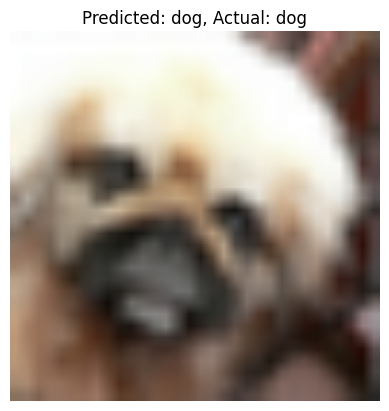

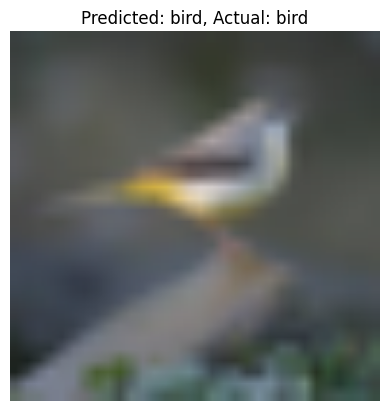

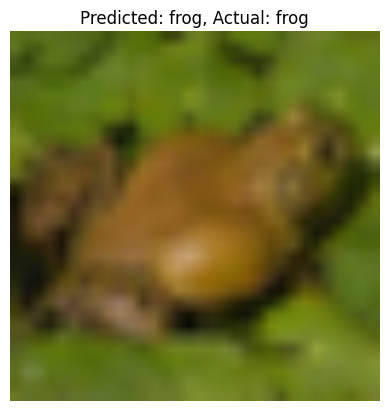

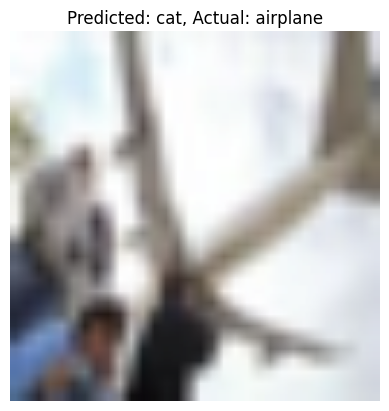

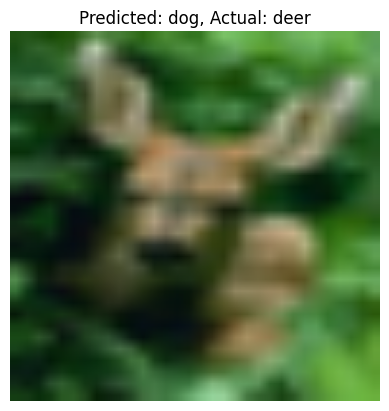


Evaluation Metrics:
Accuracy : 0.8281
Precision: 0.8513
Recall   : 0.8500
F1-Score : 0.8250

Classification Report:
               precision    recall  f1-score   support

    airplane       1.00      0.75      0.86         8
  automobile       0.88      1.00      0.93         7
        bird       0.75      0.75      0.75         8
         cat       0.56      1.00      0.71         5
        deer       1.00      0.60      0.75        10
         dog       0.88      1.00      0.93         7
        frog       1.00      0.60      0.75         5
       horse       0.60      1.00      0.75         3
        ship       1.00      0.80      0.89         5
       truck       0.86      1.00      0.92         6

    accuracy                           0.83        64
   macro avg       0.85      0.85      0.83        64
weighted avg       0.87      0.83      0.83        64



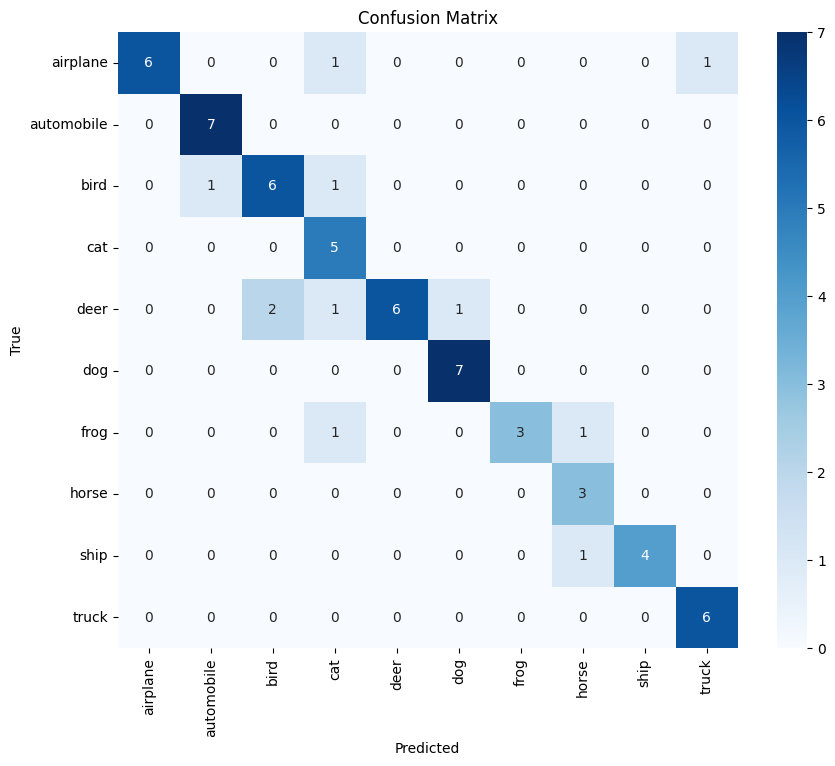

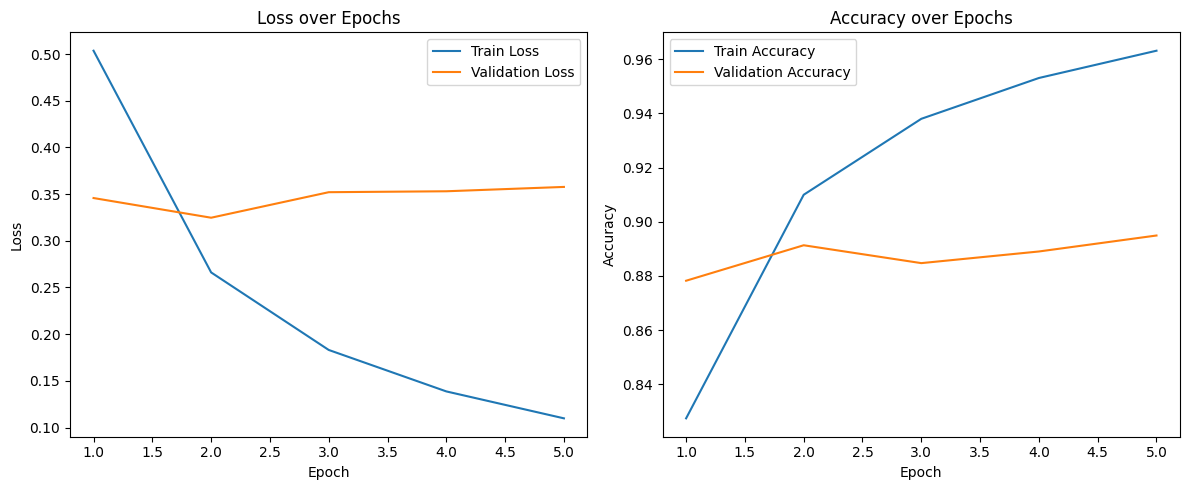

In [ ]:
import os
import pickle
import numpy as np
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Config
DATASET_PATH = r"*\\cifar-10-batches-py"
BATCH_SIZE = 64
EPOCHS = 5
LEARNING_RATE = 1e-3
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Unpickle CIFAR-10
def unpickle(file):
    with open(file, 'rb') as fo:
        return pickle.load(fo, encoding='bytes')

def load_cifar10_all_classes(dataset_path):
    images, labels = [], []
    for i in range(1, 6):
        batch = unpickle(os.path.join(dataset_path, f'data_batch_{i}'))
        data = batch[b'data'].reshape(-1, 3, 32, 32)
        targets = np.array(batch[b'labels'])
        images.append(data)
        labels.append(targets)
    return np.concatenate(images), np.concatenate(labels)

# Dataset
class CIFARFullDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx].astype(np.uint8)
        image = np.transpose(image, (1, 2, 0))
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return image, label

# Transforms
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load dataset
images, labels = load_cifar10_all_classes(DATASET_PATH)
full_dataset = CIFARFullDataset(images, labels, transform=train_transform)

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
val_dataset.dataset.transform = test_transform

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# Load pretrained ResNet and modify final layer
resnet = models.resnet18(pretrained=True)
# Fine-tune last few layers (prevent full freezing)
for name, param in resnet.named_parameters():
    if "layer4" in name or "fc" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

# Replace final layer for 10-class classification with dropout
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_ftrs, 10)
)
resnet = resnet.to(device)

# Loss and optimizer with weight decay (L2 regularization)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, resnet.parameters()),
                             lr=LEARNING_RATE, weight_decay=1e-4)

# Training loop
train_losses, val_losses = [], []
train_accs, val_accs = [], []
best_val_acc = 0.0
model_save_path = "resnet_best.pth"

for epoch in range(EPOCHS):
    resnet.train()
    running_loss, correct, total = 0.0, 0, 0
    for step, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = outputs.max(1)
        total += labels.size(0)
        correct += preds.eq(labels).sum().item()
        print(f"Epoch [{epoch+1}], Step [{step+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    train_losses.append(running_loss / len(train_loader))
    train_accs.append(correct / total)

    # Validation
    resnet.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = resnet(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = outputs.max(1)
            total += labels.size(0)
            correct += preds.eq(labels).sum().item()
    val_losses.append(val_loss / len(val_loader))
    val_accs.append(correct / total)

    print(f"Epoch [{epoch+1}/{EPOCHS}] Train Loss: {train_losses[-1]:.4f}, Acc: {train_accs[-1]:.4f} | "
          f"Val Loss: {val_losses[-1]:.4f}, Acc: {val_accs[-1]:.4f}")

    # Save best model based on validation accuracy
    if val_accs[-1] > best_val_acc:
        best_val_acc = val_accs[-1]
        torch.save(resnet.state_dict(), model_save_path)
        print(f"Best model saved at epoch {epoch+1} with val acc: {best_val_acc:.4f}")

# Load the best model before evaluation
resnet.load_state_dict(torch.load(model_save_path))

# Evaluation
resnet.eval()

y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet(images)
        preds = outputs.argmax(dim=1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

        # Display 5 predicted images with labels
        for i in range(min(5, images.size(0))):
            img = images[i].cpu().permute(1, 2, 0).numpy()
            img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # unnormalize
            img = np.clip(img, 0, 1)

            plt.imshow(img)
            plt.title(f"Predicted: {CLASS_NAMES[preds[i]]}, Actual: {CLASS_NAMES[labels[i]]}")
            plt.axis('off')
            plt.show()

        break  # only show from first batch

# Metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro')
rec = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"\nEvaluation Metrics:\nAccuracy : {acc:.4f}\nPrecision: {prec:.4f}\nRecall   : {rec:.4f}\nF1-Score : {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=CLASS_NAMES))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Plot training curves
epochs = range(1, EPOCHS + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accs, label='Train Accuracy')
plt.plot(epochs, val_accs, label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
